In [1]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(1, input_shape=[None,1]) # Univariate time series
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
import pandas as pd
from pathlib import Path

path = Path("datasets/ridership/CTA_-_Ridership_-_Daily_Boarding_Totals.csv")
df = pd.read_csv(path, parse_dates=["service_date"])
df.columns = ["date", "day_type", "bus", "rail", "total"]  # shorter names
df = df.sort_values("date").set_index("date")
df = df.drop("total", axis=1)  # no need for total, it's just bus + rail
df = df.drop_duplicates()  # remove duplicated months (2011-10 and 2014-07)

df.head()

,day_type,bus,rail
date,,,
2001-01-01,U,297192,126455
2001-01-02,W,780827,501952
2001-01-03,W,824923,536432
2001-01-04,W,870021,550011
2001-01-05,W,890426,557917


In [5]:
rail_train = df["rail"]["2016-01":"2018-12"] / 1e6
rail_valid = df["rail"]["2019-01":"2019-05"] / 1e6
rail_test = df["rail"]["2019-06":] / 1e6

In [6]:
seq_length = 56
train_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_train.to_numpy(),
    targets = rail_train[seq_length:],
    sequence_length = seq_length,
    batch_size = 32,
    shuffle = True,
    seed=42
)

valid_ds = tf.keras.utils.timeseries_dataset_from_array(
    rail_valid.to_numpy(),
    targets=rail_valid[seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)

In [7]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=50, restore_best_weights=True
)

opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = opt,
    metrics=["mae"]
)

history = model.fit(train_ds, validation_data=valid_ds, epochs=500, callbacks=early_stopping_cb)

Epoch 1/500
33/33 [==============================] - 2s 23ms/step - loss: 0.5480 - mae: 0.9559 - val_loss: 0.0186 - val_mae: 0.1304
Epoch 2/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0581 - mae: 0.2885 - val_loss: 0.0774 - val_mae: 0.3520
Epoch 3/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0646 - mae: 0.3111 - val_loss: 0.0637 - val_mae: 0.3108
Epoch 4/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0433 - mae: 0.2302 - val_loss: 0.0303 - val_mae: 0.1708
Epoch 5/500
33/33 [==============================] - 0s 13ms/step - loss: 0.0203 - mae: 0.1503 - val_loss: 0.0172 - val_mae: 0.1409
Epoch 6/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0172 - mae: 0.1608 - val_loss: 0.0167 - val_mae: 0.1412
Epoch 7/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0167 - mae: 0.1585 - val_loss: 0.0163 - val_mae: 0.1383
Epoch 8/500
33/33 [==============================] - 0s 11ms/step - loss: 0.

Epoch 63/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0105 - mae: 0.1182 - val_loss: 0.0102 - val_mae: 0.1075
Epoch 64/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1177 - val_loss: 0.0102 - val_mae: 0.1073
Epoch 65/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1175 - val_loss: 0.0103 - val_mae: 0.1066
Epoch 66/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1172 - val_loss: 0.0102 - val_mae: 0.1069
Epoch 67/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1169 - val_loss: 0.0103 - val_mae: 0.1065
Epoch 68/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1171 - val_loss: 0.0103 - val_mae: 0.1064
Epoch 69/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1168 - val_loss: 0.0102 - val_mae: 0.1063
Epoch 70/500
33/33 [==============================] - 0s 11ms/step - 

33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1132 - val_loss: 0.0103 - val_mae: 0.1031
Epoch 125/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1132 - val_loss: 0.0103 - val_mae: 0.1032
Epoch 126/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1134 - val_loss: 0.0102 - val_mae: 0.1032
Epoch 127/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1133 - val_loss: 0.0102 - val_mae: 0.1031
Epoch 128/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1135 - val_loss: 0.0102 - val_mae: 0.1031
Epoch 129/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1134 - val_loss: 0.0102 - val_mae: 0.1031
Epoch 130/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0104 - mae: 0.1134 - val_loss: 0.0102 - val_mae: 0.1031
Epoch 131/500
33/33 [==============================] - 0s 10ms/step - loss: 

33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1132 - val_loss: 0.0102 - val_mae: 0.1029
Epoch 186/500
33/33 [==============================] - 0s 9ms/step - loss: 0.0104 - mae: 0.1129 - val_loss: 0.0103 - val_mae: 0.1029
Epoch 187/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1133 - val_loss: 0.0102 - val_mae: 0.1030
Epoch 188/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1130 - val_loss: 0.0103 - val_mae: 0.1028
Epoch 189/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1129 - val_loss: 0.0103 - val_mae: 0.1028
Epoch 190/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1131 - val_loss: 0.0103 - val_mae: 0.1028
Epoch 191/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0104 - mae: 0.1131 - val_loss: 0.0102 - val_mae: 0.1029
Epoch 192/500
33/33 [==============================] - 0s 9ms/step - loss: 0.

33/33 [==============================] - 0s 11ms/step - loss: 0.0104 - mae: 0.1130 - val_loss: 0.0103 - val_mae: 0.1030
Epoch 247/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0103 - mae: 0.1130 - val_loss: 0.0103 - val_mae: 0.1028
Epoch 248/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1132 - val_loss: 0.0102 - val_mae: 0.1030
Epoch 249/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1130 - val_loss: 0.0103 - val_mae: 0.1029
Epoch 250/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1132 - val_loss: 0.0102 - val_mae: 0.1030
Epoch 251/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0103 - mae: 0.1128 - val_loss: 0.0103 - val_mae: 0.1029
Epoch 252/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0104 - mae: 0.1132 - val_loss: 0.0103 - val_mae: 0.1028


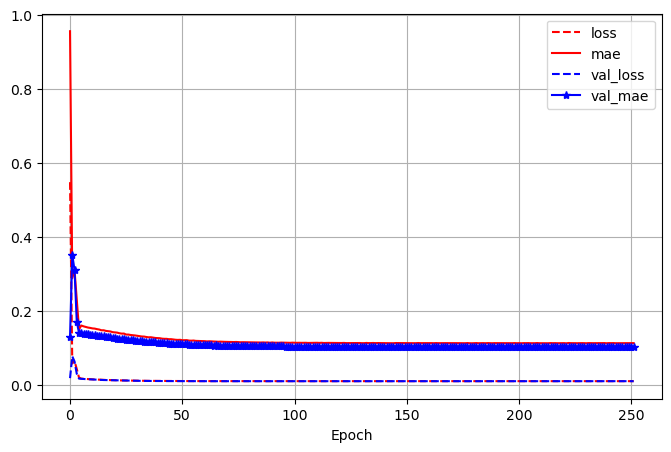

In [8]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize = (8,5), grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=[None,1]),
    tf.keras.layers.Dense(1) # no activation function by default
])

In [11]:
opt = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = opt,
    metrics=["mae"]
)

history = model.fit(train_ds, validation_data=valid_ds, epochs=500, callbacks=early_stopping_cb)

Epoch 1/500
33/33 [==============================] - 2s 18ms/step - loss: 0.0315 - mae: 0.1834 - val_loss: 0.0062 - val_mae: 0.0954
Epoch 2/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0061 - mae: 0.0803 - val_loss: 0.0032 - val_mae: 0.0606
Epoch 3/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0047 - mae: 0.0667 - val_loss: 0.0033 - val_mae: 0.0600
Epoch 4/500
33/33 [==============================] - 0s 13ms/step - loss: 0.0047 - mae: 0.0653 - val_loss: 0.0032 - val_mae: 0.0570
Epoch 5/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0042 - mae: 0.0617 - val_loss: 0.0028 - val_mae: 0.0510
Epoch 6/500
33/33 [==============================] - 0s 10ms/step - loss: 0.0042 - mae: 0.0628 - val_loss: 0.0037 - val_mae: 0.0668
Epoch 7/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0044 - mae: 0.0656 - val_loss: 0.0027 - val_mae: 0.0487
Epoch 8/500
33/33 [==============================] - 0s 11ms/step - loss: 0.

33/33 [==============================] - 0s 12ms/step - loss: 0.0025 - mae: 0.0419 - val_loss: 0.0020 - val_mae: 0.0308
Epoch 63/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0437 - val_loss: 0.0027 - val_mae: 0.0428
Epoch 64/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0028 - mae: 0.0461 - val_loss: 0.0020 - val_mae: 0.0318
Epoch 65/500
33/33 [==============================] - 0s 12ms/step - loss: 0.0025 - mae: 0.0424 - val_loss: 0.0022 - val_mae: 0.0340
Epoch 66/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0434 - val_loss: 0.0021 - val_mae: 0.0349
Epoch 67/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0439 - val_loss: 0.0020 - val_mae: 0.0307
Epoch 68/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0027 - mae: 0.0455 - val_loss: 0.0021 - val_mae: 0.0350
Epoch 69/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0026 

33/33 [==============================] - 0s 10ms/step - loss: 0.0026 - mae: 0.0424 - val_loss: 0.0019 - val_mae: 0.0334
Epoch 124/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0025 - mae: 0.0419 - val_loss: 0.0019 - val_mae: 0.0314
Epoch 125/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0025 - mae: 0.0427 - val_loss: 0.0020 - val_mae: 0.0305
Epoch 126/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0025 - mae: 0.0408 - val_loss: 0.0019 - val_mae: 0.0303
Epoch 127/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0025 - mae: 0.0421 - val_loss: 0.0018 - val_mae: 0.0291
Epoch 128/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0026 - mae: 0.0427 - val_loss: 0.0019 - val_mae: 0.0289
Epoch 129/500
33/33 [==============================] - 0s 11ms/step - loss: 0.0024 - mae: 0.0399 - val_loss: 0.0019 - val_mae: 0.0304


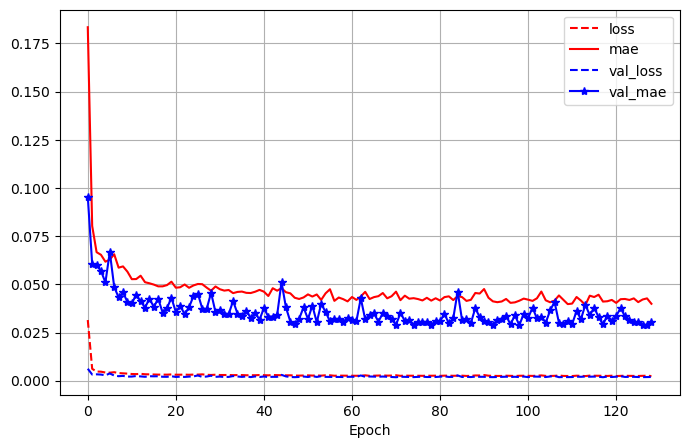

In [12]:
pd.DataFrame(history.history).plot(
    figsize = (8,5), grid=True, xlabel="Epoch",
    style=["r--", "r-", "b--", "b-*"]
)
plt.show()